In [5]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, _tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sn
import numpy as np


In [6]:
wine = pd.read_csv('../Inlämning 3 - Decision trees/WineQT.csv')

In [7]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


### Hur många datapunkter och attribut finns det?

In [8]:
print(f'There is {wine.shape[0]} datapoints and {wine.shape[1]} attributes')

There is 1143 datapoints and 13 attributes


### Hur många klasser av kvalitet finns det?

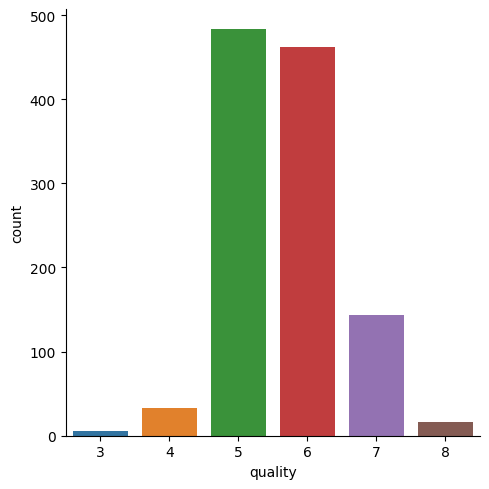

In [9]:
sn.catplot(x='quality', data = wine, kind = 'count')

In [10]:
wine_classes_quality = wine['quality'].unique()

wine_classes_quality_count = len(wine_classes_quality)

In [11]:
print(f'The classes are: {wine_classes_quality}. Therefor we have {wine_classes_quality_count} classes of quality')

The classes are: [5 6 7 4 8 3]. Therefor we have 6 classes of quality


----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Hur ser distributionen ut för de olika attributen?

fixed acidity


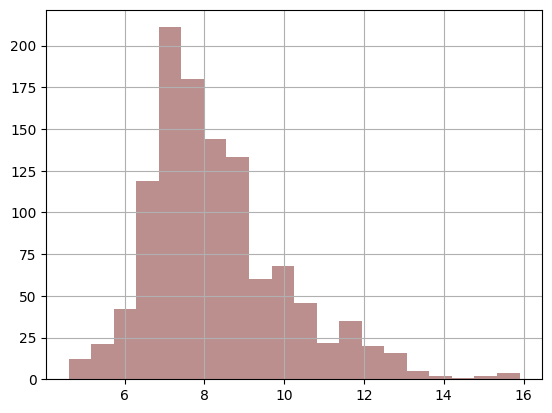

volatile acidity


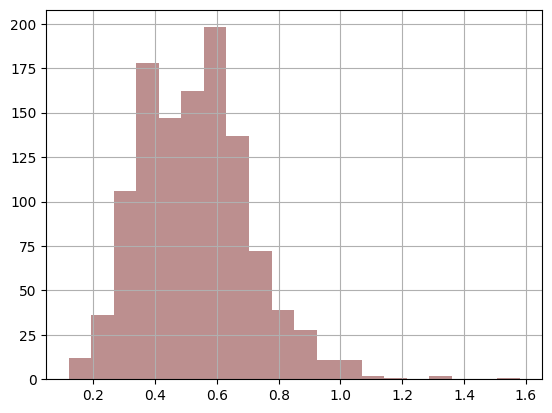

citric acid


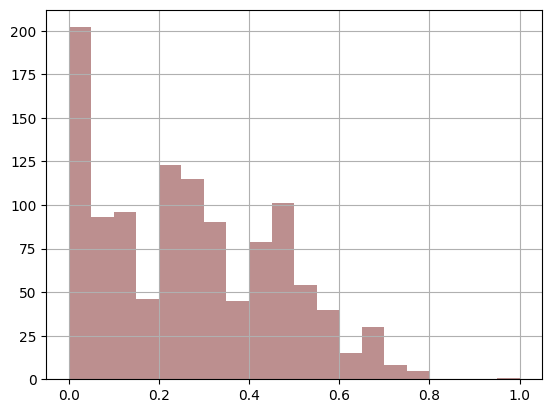

residual sugar


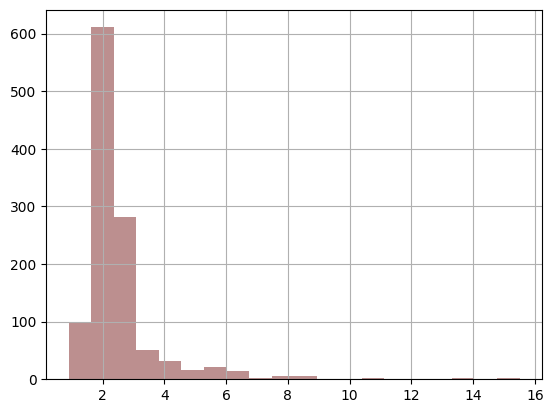

chlorides


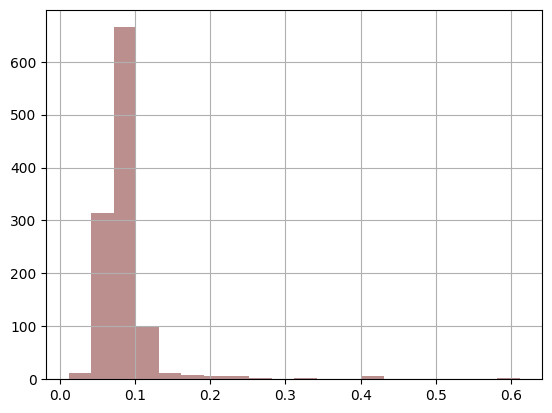

free sulfur dioxide


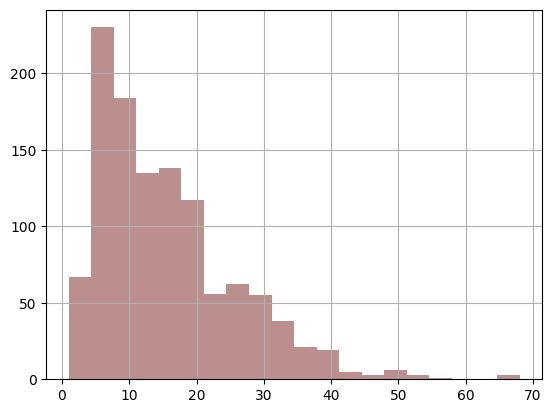

total sulfur dioxide


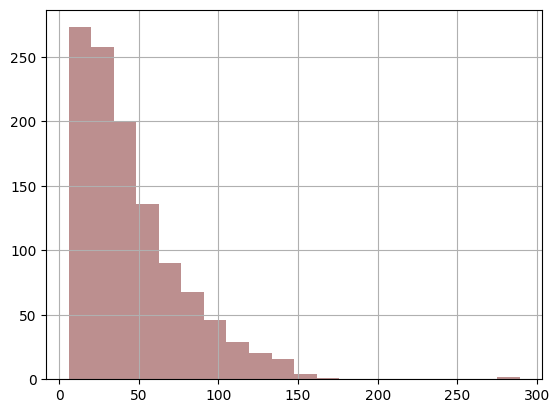

density


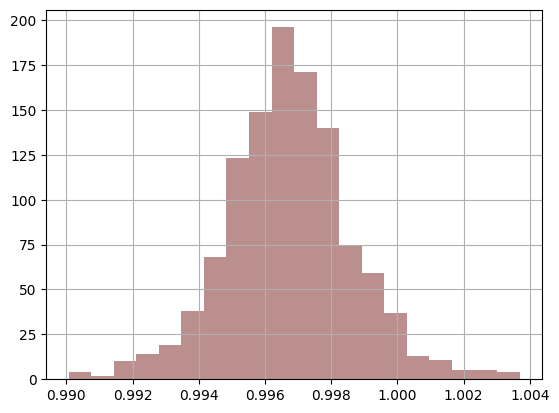

pH


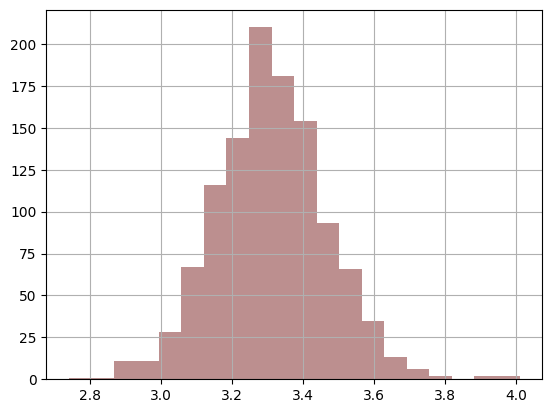

sulphates


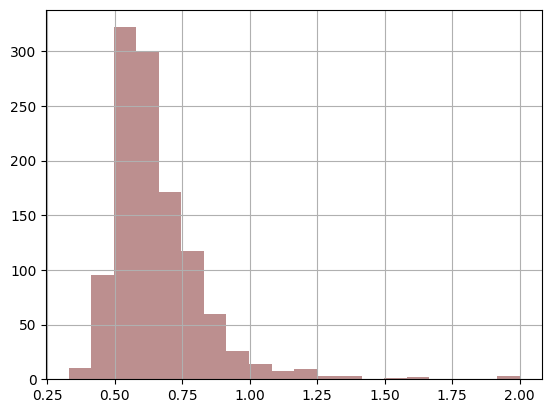

alcohol


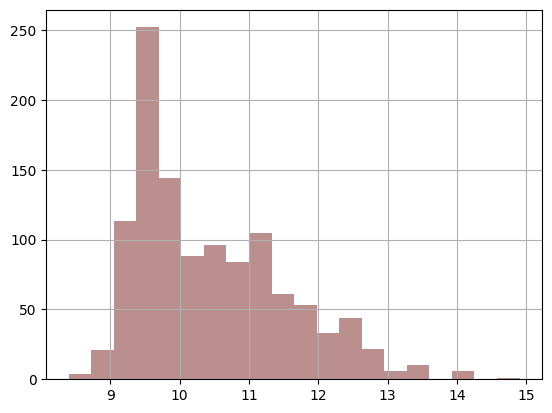

quality


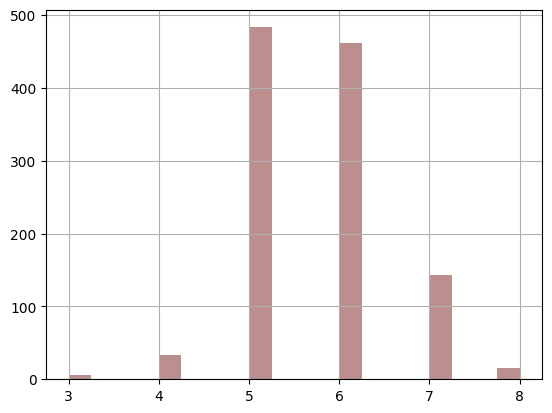

Id


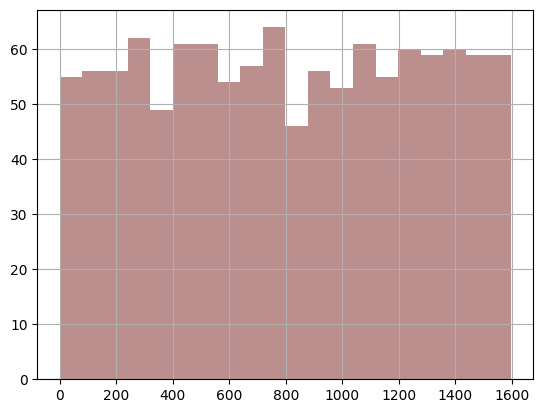

In [12]:
for q in wine.columns:
    print(q)
    wine[q].hist(bins=20, color='rosybrown' )
    plt.show()

In [13]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


### Nedan är korrelationen för attributen:

<Axes: >

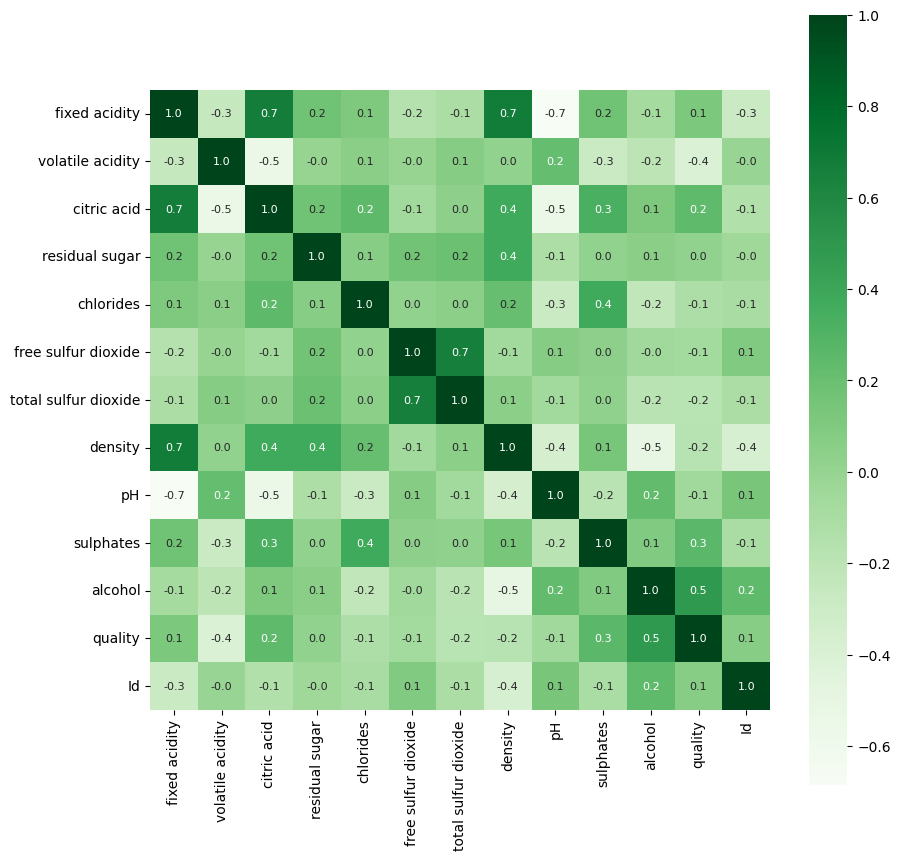

In [14]:
correlation = wine.corr()
plt.figure(figsize=(10,10))
sn.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Greens')

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Finns det något attribut som inte borde användas?

In [15]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

Ovan har jag tagit fram noll-värderna i datasetet. Vad vi kan se så är inget attribut null så rent logiskt sätt är det enda attribut som inte borde användas "Id". Alla andra attribut är med och påverkar alla vinerna. Så vid tester och för att se hur de olika attributen påverkar kvaliten behöver alla vara med förutom Id.

In [16]:
wine.drop(columns='Id')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


### Dela upp datan i träning och testset

In [17]:
x = wine.drop(columns=['quality', 'Id'], axis=1)
y = wine['quality']

In [18]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2


In [19]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1138    6
1139    6
1140    5
1141    6
1142    5
Name: quality, Length: 1143, dtype: int64

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [21]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
485,9.8,0.98,0.32,2.3,0.078,35.0,152.0,0.99800,3.25,0.48,9.4
420,9.0,0.45,0.49,2.6,0.084,21.0,75.0,0.99870,3.35,0.57,9.7
922,7.6,1.58,0.00,2.1,0.137,5.0,9.0,0.99476,3.50,0.40,10.9
809,7.0,0.22,0.30,1.8,0.065,16.0,20.0,0.99672,3.61,0.82,10.0
615,7.2,0.62,0.06,2.5,0.078,17.0,84.0,0.99746,3.51,0.53,9.7
...,...,...,...,...,...,...,...,...,...,...,...
1044,6.7,1.04,0.08,2.3,0.067,19.0,32.0,0.99648,3.52,0.57,11.0
1095,8.0,0.39,0.30,1.9,0.074,32.0,84.0,0.99717,3.39,0.61,9.0
1130,7.4,0.35,0.33,2.4,0.068,9.0,26.0,0.99470,3.36,0.60,11.9
860,7.9,0.57,0.31,2.0,0.079,10.0,79.0,0.99677,3.29,0.69,9.5


### Träna ett decision tree

In [22]:
dec = DecisionTreeClassifier()

In [23]:
dec.fit(X_train, Y_train)

DecisionTreeClassifier()

###  Vad får modellen för testscore?

In [24]:
def get_train_and_test_score():
    print(f'The train-score is: {dec.score(X_train, Y_train)}.')
    print(f'The test-score is: {dec.score(X_test, Y_test)}.')
    return

In [25]:
get_train_and_test_score()

The train-score is: 1.0.
The test-score is: 0.5597667638483965.


### Hur djupt är trädet?

In [26]:
clf = tree.DecisionTreeClassifier()  # set hyperparameter
clf.fit(x, y)

DecisionTreeClassifier()

In [27]:
print(f'The tree is {clf.get_depth()} deep')

The tree is 18 deep


### Hur många löv har trädet?

In [28]:
print(f'The tree has {clf.get_n_leaves()} leaves')

The tree has 295 leaves


### Vilka attribut har störst påverkan?

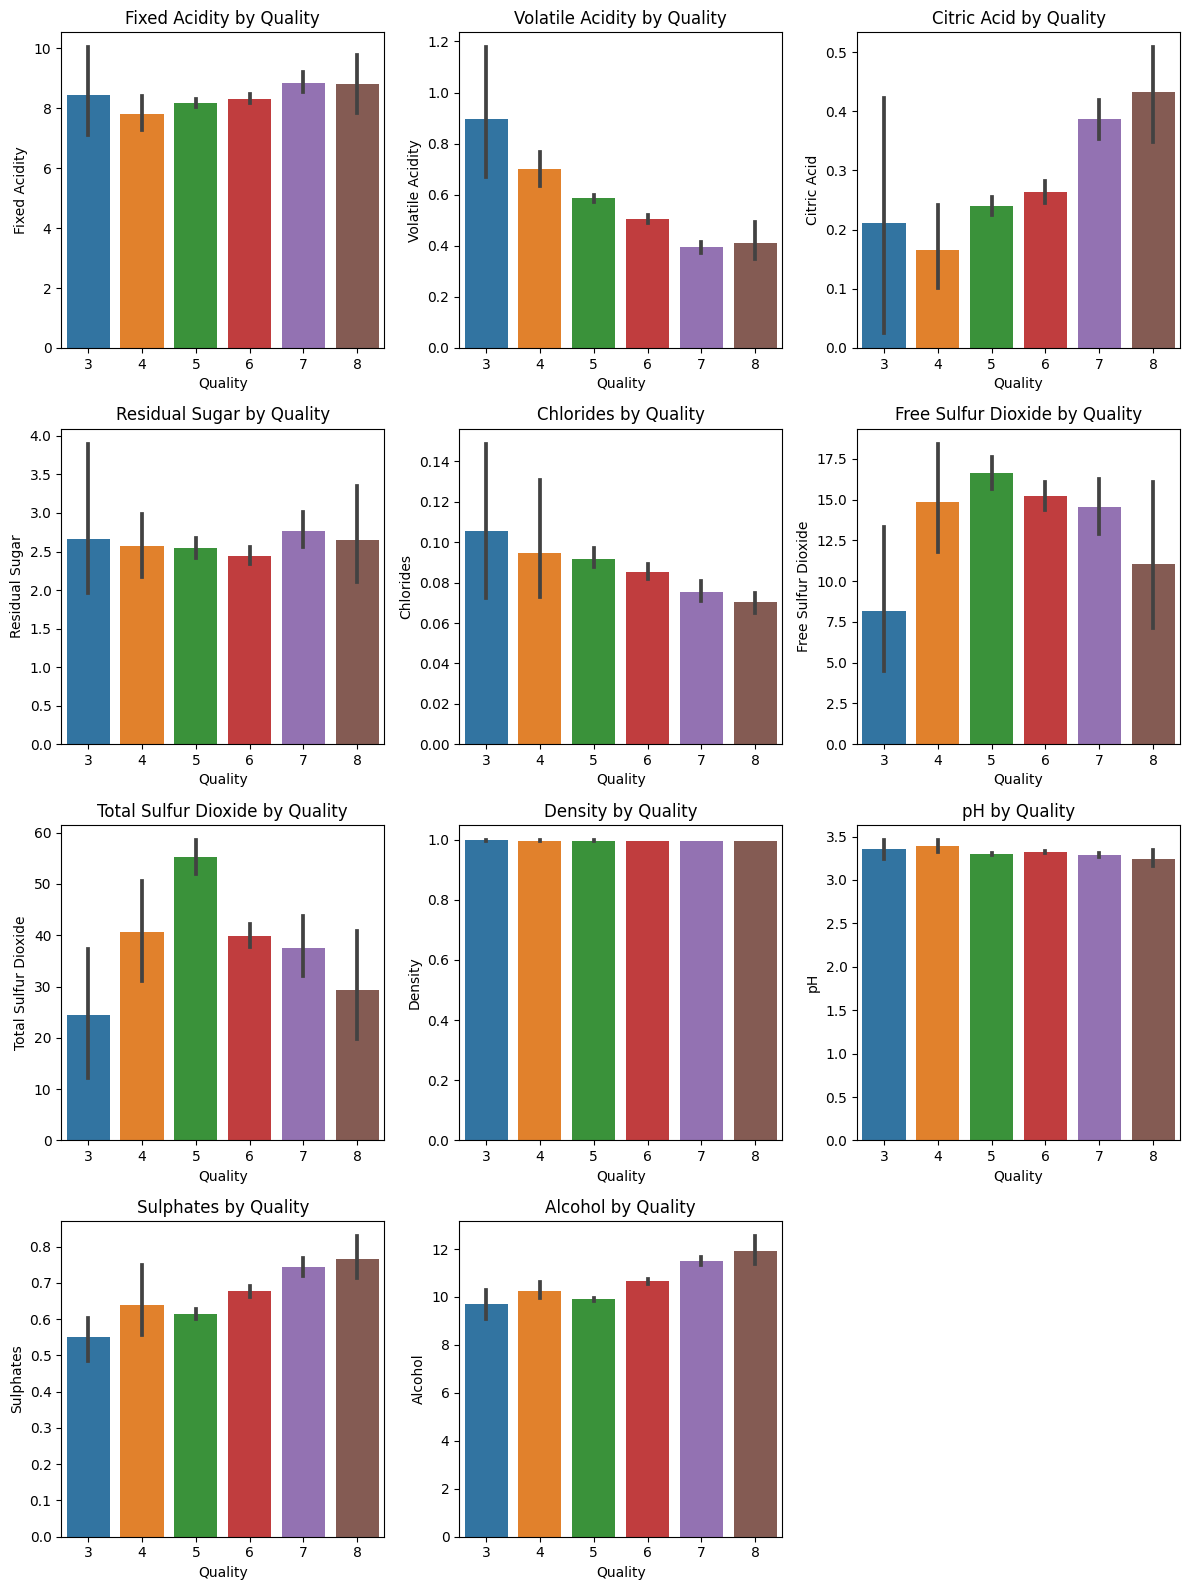

In [29]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12,16))

attributes = [('fixed acidity', 'Fixed Acidity'), ('volatile acidity', 'Volatile Acidity'),
             ('citric acid', 'Citric Acid'), ('residual sugar', 'Residual Sugar'),
             ('chlorides', 'Chlorides'), ('free sulfur dioxide', 'Free Sulfur Dioxide'),
             ('total sulfur dioxide', 'Total Sulfur Dioxide'), ('density', 'Density'),
             ('pH', 'pH'), ('sulphates', 'Sulphates'),
             ('alcohol', 'Alcohol')]

for i, (var, y_label) in enumerate(attributes):
    row = i // 3  
    col = i % 3  
    sn.barplot(x='quality', y=var, data=wine, ax=axes[row][col])
    axes[row][col].set_xlabel('Quality')
    axes[row][col].set_ylabel(y_label)
    axes[row][col].set_title(f'{y_label} by Quality')

axes[-1][-1].axis('off')
    
plt.tight_layout()

plt.show()

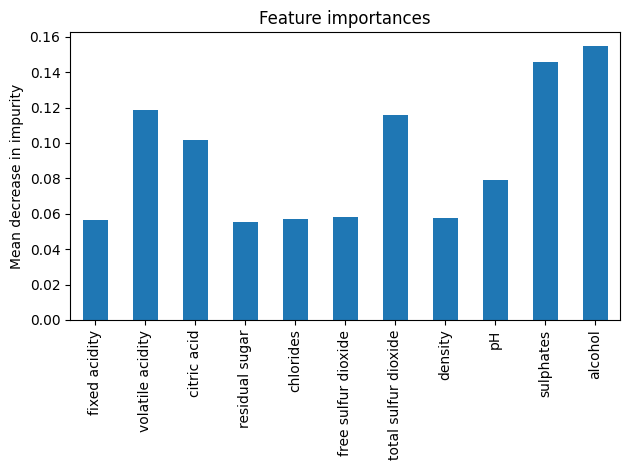

In [30]:
importances = dec.feature_importances_

decision_tree_importances = pd.Series(importances, index=x.columns)

fig, ax = plt.subplots()
decision_tree_importances.plot.bar(ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

 Som vi kan se i diagrammet har följande attribut störst påverkan:
 - Alcohol
 - Sulphates
 - Volatile Acidity
 - Total Sulfur Dioxide
 
 Kikar vi på histogrammet vi gjorde tidigare kan vi analysera datan ytterligare:
 - Alcohol <br>
    Vi kan se att de viner som har mer alkohol i sig verkar också vara de viner som är i den bästa kvalitetklassen.
 - Sulphates <br>
   Även här kan vi se att desto mer sulphates vinerna har desto bättre kvalitet.
 - Volatile Acidity <br>
    Här har vi också stora skillnader beroende på hur mycket Volatile Acidity som finns i vinerna. Bättre kvalitet verkar vinerna ha om det är mindre Volatile Acidity i dem.
 - Total Sulfur Dioxide <br>
    Vi kan se att de viner med för lite Total Sulfur Dioxide har dålig kvalitet. Däremot verkar det som att har man för mycket Total Sulfur Dioxide får den inte särkilt bättre kvalitet. En hårfin linje verkar det vara vid detta attribut, därav har Total Sulfur Dioxide stor påverkan på kvaliten

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### VG

### Jämför träningsscore och testscore.

In [31]:
get_train_and_test_score()

The train-score is: 1.0.
The test-score is: 0.5597667638483965.


### Hur skiljer de sig och varför?

Träningsscoren blir 1.0 och testscore blir ca 0.56. Skillnaden är att på träningsscore vet datan redan svaret vilket gör att vi får ett högre resultat i dem flesta fallen, min träningsscore blev dock overfitted vilket jag kommer försöka lösa nedan. Testscore testar data som den inte sett tidigare. Testscoren ger en indikation på hur modellen kommer fungera på verklig data, detta gör den genom att testas oberoende. Tillskillnad från träningsscore som är beroende. Man vill ha en hög testscore eftersom modellen ska användas för att predicta på ny okänd data.
Nu blev inte min testscore särskilt hög men nedan kommer jag att testa mig fram för att kunna manipulera fram ett bättre test-resultat. 

### Finns det något att göra åt fenomenet?

Nu när jag tagit fram de attribut som påverkar resultaten mest har jag valt nedan att ta bort de attribut som påverkar resultaten minst. Utöver det har jag lekt med olika test-size, jag kom fram till här att bästa test-size är: 0.3. Jag har även lagt till max-depth som jag testat mig fram till, här kom jag fram till att bästa max-depth är: 10. Jag har även lagt till en lambda-funktion som gör stor skillnad för test-score. I detta fall kommer funktionen ge alla kolumner som har en kvalitet på 6 eller högre ge 1 som testscore medan alla andra kommer få en testscore på 0. Jag valde först en kvalitet på 7 eller högre men min träningsscore blev fortfarande overfitted. Jag fick dock ett resultat på testscore som var på 97%. Men för att undvika att träningsscoren skulle bli overfitted valde jag kvalitet 6 eller högre som tyvärr gjorde att testscoren gick ned till 84%. Det är dock ett resultat jag är nöjd med.

In [50]:
X = wine.drop(columns=['density', 'quality', 'fixed acidity', 'pH', 'sulphates', 'residual sugar', 'Id'], axis=1)
Y = wine['quality'].apply(lambda y_value: 1 if y_value>6 else 0)

In [51]:
X

,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,alcohol
0,0.700,0.00,0.076,11.0,34.0,9.4
1,0.880,0.00,0.098,25.0,67.0,9.8
2,0.760,0.04,0.092,15.0,54.0,9.8
3,0.280,0.56,0.075,17.0,60.0,9.8
4,0.700,0.00,0.076,11.0,34.0,9.4
...,...,...,...,...,...,...
1138,0.510,0.13,0.076,29.0,40.0,11.0
1139,0.620,0.08,0.068,28.0,38.0,9.5
1140,0.600,0.08,0.090,32.0,44.0,10.5
1141,0.550,0.10,0.062,39.0,51.0,11.2


In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [53]:
clf_2 = tree.DecisionTreeClassifier(max_depth=10)
clf_2.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=10)

In [54]:
print(f'The train-score is: {clf_2.score(X_train, Y_train)}.')

The train-score is: 0.9875.


In [55]:
print(f'The test-score is: {clf_2.score(X_test, Y_test)}.')

The test-score is: 0.8454810495626822.


### Rita ut trädet

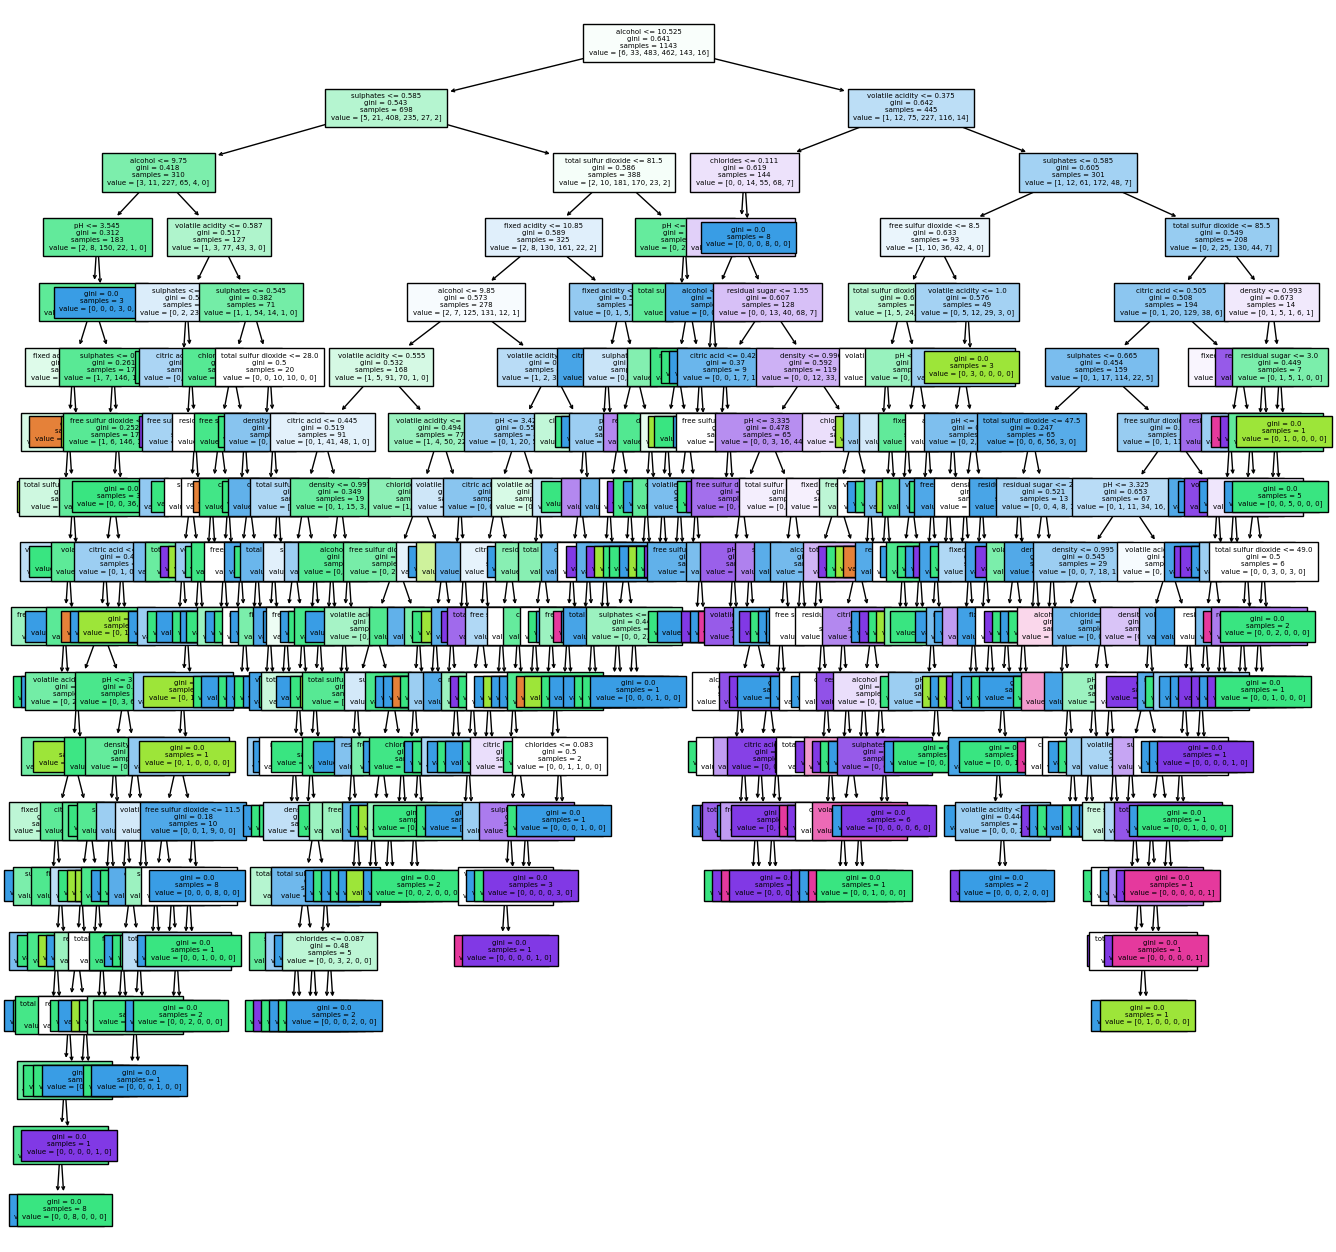

In [38]:
plt.figure(figsize=(16,16))
tree.plot_tree(clf, fontsize=5, feature_names=clf.feature_names_in_,filled=True)
plt.show()

### Hur många grenar kommer det maximalt från en nod?

Vad vi kan se visuellt i vårt träd kommer det ut maximalt 2 grenar från varje nod. Vilket vi även får bekräftat nedan.

In [39]:
for i in range(clf.tree_.node_count):
    n_children = 0
    if clf.tree_.children_left[i] != -1:
        n_children += 1
    if clf.tree_.children_right[i] != -1:
        n_children += 1
    print(f"Node {i} has {n_children} branches")


Node 0 has 2 branches
Node 1 has 2 branches
Node 2 has 2 branches
Node 3 has 2 branches
Node 4 has 2 branches
Node 5 has 2 branches
Node 6 has 2 branches
Node 7 has 0 branches
Node 8 has 2 branches
Node 9 has 2 branches
Node 10 has 2 branches
Node 11 has 0 branches
Node 12 has 0 branches
Node 13 has 0 branches
Node 14 has 0 branches
Node 15 has 0 branches
Node 16 has 2 branches
Node 17 has 0 branches
Node 18 has 2 branches
Node 19 has 2 branches
Node 20 has 2 branches
Node 21 has 2 branches
Node 22 has 2 branches
Node 23 has 2 branches
Node 24 has 2 branches
Node 25 has 0 branches
Node 26 has 2 branches
Node 27 has 2 branches
Node 28 has 0 branches
Node 29 has 0 branches
Node 30 has 0 branches
Node 31 has 2 branches
Node 32 has 2 branches
Node 33 has 2 branches
Node 34 has 2 branches
Node 35 has 2 branches
Node 36 has 2 branches
Node 37 has 0 branches
Node 38 has 0 branches
Node 39 has 0 branches
Node 40 has 0 branches
Node 41 has 2 branches
Node 42 has 0 branches
Node 43 has 0 branche

In [40]:
branches = []
for i in range(clf.tree_.node_count):
    nchildren = 0
    if clf.tree_.children_left[i] != -1:
        nchildren += 1
    if clf.tree_.children_right[i] != -1:
        n_children += 1
    branches.append(n_children)
print(f'The maximum value of all the branches: {max(branches)}')

The maximum value of all the branches: 294


In [41]:
clf.get_params()
print(f'Maximum branches from each nod: {clf.min_samples_split}')

Maximum branches from each nod: 2


### Varför är det max så många grenar från en nod?

Antal grenar är alltid en mindre än antal noddar så det påverkar mycket. Sedan är det även vanligt att man begränsar antalet grenar pga att grafen ska vara mer lättförståeligt, man upptäcker lättare samband och även för att maximera prestandan. Med det menar jag att om grafen är för komplex kan det kräva mer resurser vilket gör att det går långsammare.